# Packages Loading


In [78]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

from data_loading import read_hackathon_data
from metrics.june_dataset import JuNEDataset, NotebookState
from metrics.metrics_graph import GraphMetrics
from metrics.utils.graph_tools import evolution_to_graphviz


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read Data


In [79]:
path = Path("data_config.yaml")
df_hack = read_hackathon_data(path, attach_users=True)
df_hack.head()


hack_db.db


,id,ip_address,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,cell_output,expert,user_id
0,10,None,2023-05-06T08:30:38.037Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,save_notebook,None,NaN,None,"[\n {\n ""id"": ""e4836a849dea49f1a753df2274f...",None,False,student_2
1,17,192.168.1.56,2023-05-06T08:31:35.929Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,execute,e4836a849dea49f1a753df2274fbdbc5,0.0,code,# # Do not forget to check if your notebook lo...,None,False,student_2
2,18,192.168.1.56,2023-05-06T08:31:35.944Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,create,dbcf462e8f6c4e3a89c0d6d0d083c0b2,0.0,code,None,None,False,student_2
3,19,192.168.1.56,2023-05-06T08:31:36.049Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,finished_execute,e4836a849dea49f1a753df2274fbdbc5,1.0,code,# # Do not forget to check if your notebook lo...,"[{""output_type"":""stream"",""size"":23}]",False,student_2
4,41,192.168.1.56,2023-05-06T08:37:46.346Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,execute,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,code,!ls data/task1,None,False,student_2


In [80]:
june = JuNEDataset(df_hack)
june.to_dataframe().head()


,id,ip_address,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,cell_output,expert,user_id
0,10,None,2023-05-06T08:30:38.037Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,save_notebook,None,NaN,None,"[\n {\n ""id"": ""e4836a849dea49f1a753df2274f...",None,False,student_2
1,17,192.168.1.56,2023-05-06T08:31:35.929Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,execute,e4836a849dea49f1a753df2274fbdbc5,0.0,code,# # Do not forget to check if your notebook lo...,None,False,student_2
2,18,192.168.1.56,2023-05-06T08:31:35.944Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,create,dbcf462e8f6c4e3a89c0d6d0d083c0b2,0.0,code,None,None,False,student_2
3,19,192.168.1.56,2023-05-06T08:31:36.049Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,finished_execute,e4836a849dea49f1a753df2274fbdbc5,1.0,code,# # Do not forget to check if your notebook lo...,"[{""output_type"":""stream"",""size"":23}]",False,student_2
4,41,192.168.1.56,2023-05-06T08:37:46.346Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,execute,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,code,!ls data/task1,None,False,student_2


# Initialize Metrics Processor


In [81]:
processor = GraphMetrics()


# Metrics Calculation


In [82]:
grouped = june.df.groupby("kernel_id")
df_kernel = grouped.get_group(list(grouped.groups.keys())[0])
df_kernel.head()

,id,ip_address,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,cell_output,expert,user_id
6367,1444,None,2023-05-06T09:58:35.270Z,7215278a-b19d-477e-82df-9a03bb979fb6,0033f76c-6179-4fb4-a9ce-79112a52b51c,task1.ipynb,execute,e139884774504ae997d7e38e6be6da88,0.0,code,# # Do not forget to check if your notebook lo...,None,False,student_0
6368,1452,None,2023-05-06T09:58:58.001Z,7215278a-b19d-477e-82df-9a03bb979fb6,0033f76c-6179-4fb4-a9ce-79112a52b51c,task1.ipynb,finished_execute,e139884774504ae997d7e38e6be6da88,0.0,code,# # Do not forget to check if your notebook lo...,"[{""output_type"":""stream"",""size"":23}]",False,student_0
6369,1453,None,2023-05-06T09:58:58.174Z,7215278a-b19d-477e-82df-9a03bb979fb6,0033f76c-6179-4fb4-a9ce-79112a52b51c,task1.ipynb,save_notebook,None,NaN,None,"[\n {\n ""id"": ""e139884774504ae997d7e38e6be...",None,False,student_0
6370,1454,172.29.66.3,2023-05-06T09:59:02.653Z,7215278a-b19d-477e-82df-9a03bb979fb6,0033f76c-6179-4fb4-a9ce-79112a52b51c,task1.ipynb,execute,a47800e62cbe40c1ad4003b2879f5f03,1.0,code,!pip install pandas\n,None,False,student_0
6371,1455,172.29.66.3,2023-05-06T09:59:03.475Z,7215278a-b19d-477e-82df-9a03bb979fb6,0033f76c-6179-4fb4-a9ce-79112a52b51c,task1.ipynb,finished_execute,a47800e62cbe40c1ad4003b2879f5f03,2.0,code,!pip install pandas\n,"[{""output_type"":""stream"",""size"":649}]",False,student_0


In [83]:
graph_metrics = processor.calculate_kernel_metrics(df_kernel)
graph_metrics.head()


,kernel_id,modularity,average_degree,average_clustering
0,0033f76c-6179-4fb4-a9ce-79112a52b51c,0.13776,18.9,0.362143


In [84]:
graph_metrics = processor.calculate_metrics(june.df)
graph_metrics.head()

100%|██████████| 49/49 [00:16<00:00,  2.97it/s]


,kernel_id,modularity,average_degree,average_clustering
0,0033f76c-6179-4fb4-a9ce-79112a52b51c,0.137760,18.900000,0.362143
0,033a2c63-4cfb-4cc5-9988-59c48a06eb23,0.584378,5.071429,0.161154
0,1d8c1c38-d342-4950-9667-f8b9872d71b7,0.510842,5.578947,0.078947
0,232bcb48-7455-4109-9eeb-809649a6bedc,0.474784,12.985507,0.287237
0,29da7c56-5a69-485f-b181-a0a7199a559c,0.572181,7.943396,0.143793


# Display graph

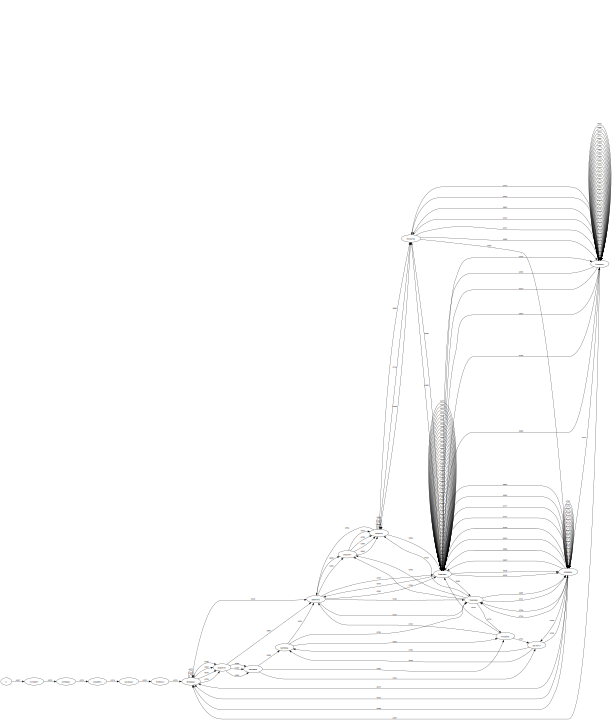

In [85]:
from analysis.metrics.utils.graph_tools import dataframe_to_graphviz

gv = dataframe_to_graphviz(df_kernel)
gv.attr(rankdir='LR', size='10,10')
gv
